Question 1
(q) A. Explain the difference between supervised and unsupervised machine
learning. 2pts

(a) For supervised learning, the algorithm takes labeled data where independent variables (also known as input features) as associated with a dependent variable (output labels). The aim is to establish classifications on new data or to make accurate predictions. Examples of this include regression and classification: predicting a continuous value or categorizing data, respectively. 

For unsupervised learning, the algortihm takes unlabled data, extracting hidden trends without any predefined labels. The aim is to reduce dimensionality or to group data into clusters. Examples of this include dimensionality reduction (e.g., T-SNE and U-MAP) and clustering (i.e., K-means).

(q) B. Describe the primary steps involved in implementing a supervised
machine learning model. 2pts

(a) The primary steps are data collection, data preprocessing, feature selection/engineering, model selection, model training, model evaluation, hyperparameters, deployment. Beginning with gathering labeled data for training and testing, one must clean the data and identify which features are the most relevant for the model. After, one must choose an appropriate algorithm, train the model with a training set, followed by testing the model with a validation dataset to evaluate performance metrics. Lastly, the model evaluation will serve to optimize model parameters, so that the model can begin making predictions about new data.

(q) C. Explain the differences between regression and classification tasks in
machine learning. 2pts

(a) The primary difference between regression and classification tasks is that the former aims at predicting continuous numerical values, while the latter categorizes data into discrete classes (often called "labels"). Examples of regression tasks include predicting house prices, market trends, or temperatures, whereas examples of classification include cell classification, sentiment analysis, or image recognition. 

Question 2 

In [1]:
import pandas as pd

# PART A: Load Data and Count Sequences
# =====================================
# Load data into DataFrames
max_df = pd.read_csv("Max.txt", sep="\t", header=None, names=["Sequence", "Affinity"])
mad_df = pd.read_csv("Mad.txt", sep="\t", header=None, names=["Sequence", "Affinity"])
myc_df = pd.read_csv("Myc.txt", sep="\t", header=None, names=["Sequence", "Affinity"])

# Count the number of sequences for each TF
max_count = max_df.shape[0]
mad_count = mad_df.shape[0]
myc_count = myc_df.shape[0]

# Print the counts
print(f"Max TF sequences: {max_count}")
print(f"Mad TF sequences: {mad_count}")
print(f"Myc TF sequences: {myc_count}")

# PART B: One-Hot Encoding Function
# =================================
def dna_one_hot(sequence, encoding_type="1-mer"):
    """
    Convert DNA sequence into one-hot encoding format.

    Args:
    - sequence (str): DNA sequence to encode.
    - encoding_type (str): "1-mer" for mononucleotide, "2-mer" for dinucleotide.

    Returns:
    - str: One-hot encoded representation of the sequence.
    """
    # Define mappings for 1-mer and 2-mer
    one_mer_map = {
        "A": "1000", "C": "0100", "G": "0010", "T": "0001"
    }
    two_mer_map = {
        "AA": "1000000000000000", "AC": "0100000000000000", "AG": "0010000000000000", "AT": "0001000000000000",
        "CA": "0000100000000000", "CC": "0000010000000000", "CG": "0000001000000000", "CT": "0000000100000000",
        "GA": "0000000010000000", "GC": "0000000001000000", "GG": "0000000000100000", "GT": "0000000000010000",
        "TA": "0000000000001000", "TC": "0000000000000100", "TG": "0000000000000010", "TT": "0000000000000001"
    }
    
    encoded_sequence = ""
    if encoding_type == "1-mer":
        # Encode each base in the sequence
        encoded_sequence = "".join([one_mer_map[base] for base in sequence])
    elif encoding_type == "2-mer":
        # Encode each dinucleotide in the sequence
        encoded_sequence = "".join([two_mer_map[sequence[i:i+2]] for i in range(len(sequence) - 1)])
    else:
        raise ValueError("Invalid encoding_type. Use '1-mer' or '2-mer'.")
    
    return encoded_sequence

# Example Usage for PART B
seq = "AAC"
print("1-mer encoding:", dna_one_hot(seq, encoding_type="1-mer"))
print("2-mer encoding:", dna_one_hot(seq, encoding_type="2-mer"))

# PART C: Normalize Binding Affinity
# ==================================
def normalize_affinity(df):
    """
    Normalize the binding affinity column in the DataFrame using min-max normalization.

    Args:
    - df (pandas.DataFrame): DataFrame with a column named 'Affinity'.

    Returns:
    - pandas.DataFrame: DataFrame with normalized 'Affinity' column.
    """
    min_val = df["Affinity"].min()
    max_val = df["Affinity"].max()
    df["Affinity"] = (df["Affinity"] - min_val) / (max_val - min_val)
    return df

# Normalize the binding affinities for each TF
max_df = normalize_affinity(max_df)
mad_df = normalize_affinity(mad_df)
myc_df = normalize_affinity(myc_df)

# Display the first few rows of each normalized DataFrame
print("Max DataFrame (Normalized):")
print(max_df.head())
print("\nMad DataFrame (Normalized):")
print(mad_df.head())
print("\nMyc DataFrame (Normalized):")
print(myc_df.head())


Max TF sequences: 8568
Mad TF sequences: 7534
Myc TF sequences: 6926
1-mer encoding: 100010000100
2-mer encoding: 10000000000000000100000000000000
Max DataFrame (Normalized):
                               Sequence  Affinity
0  GAAGCCCTGGCGGGGCGCGTGCCCGCCGCCGCCGCC  0.106881
1  TCCCGGGGCTAGAGGCATGTGGACTCAGGAGGATGA  0.232205
2  GGCGCTGCCGGACTGCGCGTGGAGTGGCGCGCTGCT  0.154269
3  GCAGCTCGCCCGGGCCACGCGGTGCCGGCCCTCGGC  0.378770
4  GGAATTACCTTCATCCACATGGTTGAAGCTGGCTGG  0.415513

Mad DataFrame (Normalized):
                               Sequence  Affinity
0  GGGCATGAAAGCCACCTCGTGGTTTTGCAGCAAGTG  0.413406
1  CGGGGAGGAGCCACCCACGCGCCACAGCAAGTCCTG  0.185719
2  GGCGGCCCGGGCATCCACGTGGGTCGGGCTCCTGGT  0.796084
3  TGCGGCTTCGGCTTCCACGCGGCATCCTAGGTAAGC  0.283824
4  TGCTCGCCTGCCTGCCATGTGCAGCGGCCCCTTTGT  0.297382

Myc DataFrame (Normalized):
                               Sequence  Affinity
0  ACCGACCGGCGCGGGCACGAGGCAATGGCGGCCGGG  0.174288
1  AACAGCGCCACCGGCCTCGTGCACTTCTTCCACTGT  0.217422
2  GCGGCCGGTCTGCA

Question 3 - Part A: Convert .txt to .fasta 

In [3]:
import pandas as pd

def convert_to_fasta(input_file, output_file):
    """
    Convert binding sequences from a given file into FASTA format.

    Args:
    - input_file (str): Path to the input file (e.g., Max.txt, Mad.txt, Myc.txt).
    - output_file (str): Path to the output FASTA file.

    Returns:
    - None
    """
    # Load the data from the input file
    df = pd.read_csv(input_file, sep="\t", header=None, names=["Sequence", "Affinity"])
    
    # Open the output FASTA file for writing
    with open(output_file, "w") as fasta_file:
        # Loop through each sequence in the dataframe
        for i, sequence in enumerate(df["Sequence"]):
            # Write the sequence identifier and sequence in FASTA format
            fasta_file.write(f">Sequence_{i + 1}\n{sequence}\n")

# Convert Max.txt, Mad.txt, and Myc.txt to FASTA format
#convert_to_fasta("Max.txt", "Max.fasta")
#convert_to_fasta("Mad.txt", "Mad.fasta")
#convert_to_fasta("Myc.txt", "Myc.fasta")

#print("FASTA files generated: Max.fasta, Mad.fasta, Myc.fasta")


FASTA files generated: Max.fasta, Mad.fasta, Myc.fasta


In [15]:
import numpy as np

def read_and_display_shape_parameters(file_paths):
    """
    Reads DNA shape parameter files with sequence identifiers and shape data rows,
    and displays the individual outputs for each file with source file names.

    Args:
    - file_paths (dict): A dictionary where keys are transcription factors (e.g., 'Max') 
      and values are lists of file paths for the respective shape features (MGW, ProT, Roll, HelT).

    Returns:
    - shape_data (dict): A dictionary where keys are transcription factors, and values are numpy arrays 
      containing the combined shape features. Each row corresponds to a sequence, 
      and each column corresponds to a shape feature.
    """
    shape_data = {}

    for tf, files in file_paths.items():
        print(f"\nTranscription Factor: {tf}")
        tf_data = []  # To store data for all shape features for a given TF
        
        for file_path in files:
            try:
                # Read the file, skipping rows with sequence identifiers
                with open(file_path, 'r') as f:
                    lines = f.readlines()
                
                # Extract only rows with numerical data (non-identifier rows)
                shape_values = [
                    list(map(float, line.strip().split(','))) 
                    for line in lines if not line.startswith('>')
                ]
                
                # Convert to numpy array and append to TF data
                feature_data = np.array(shape_values)
                tf_data.append(feature_data)
                
                # Display output for the specific file with annotation
                print(f"\nOutput for file '{file_path}':")
                print(feature_data)
            except Exception as e:
                print(f"Error reading file {file_path}: {e}")
                return None

        # Combine all shape features into a single numpy array (rows: sequences, columns: features)
        shape_data[tf] = np.concatenate(tf_data, axis=1)

    return shape_data

# File paths for each transcription factor
file_paths = {
    "Max": ["Max_MGW.txt", "Max_ProT.txt", "Max_Roll.txt", "Max_HelT.txt"],
    "Mad": ["Mad_MGW.txt", "Mad_ProT.txt", "Mad_Roll.txt", "Mad_HelT.txt"],
    "Myc": ["Myc_MGW.txt", "Myc_ProT.txt", "Myc_Roll.txt", "Myc_HelT.txt"]
}

# Execute the function
shape_data = read_and_display_shape_parameters(file_paths)



Transcription Factor: Max

Output for file 'Max_MGW.txt':
[[5.32424784 4.9806242  4.83898354 ... 5.32914639 5.03339148 5.19413471]
 [4.83939266 4.91367817 5.00554514 ... 5.37994099 5.46181583 5.12919807]
 [5.19535351 5.05014133 5.33983183 ... 5.49940395 5.22698879 5.48920441]
 ...
 [5.45915747 5.08923054 4.78969669 ... 4.93852568 5.66523266 5.61813354]
 [5.17338562 4.92357016 4.89894676 ... 5.49104881 5.06827307 4.88417673]
 [5.25420094 4.9514122  4.82571602 ... 4.93619061 4.79785538 4.54553127]]

Output for file 'Max_ProT.txt':
[[  0.22168064 -10.66078949  -8.2554512  ...  -3.34070802  -2.40636253
    2.01203346]
 [ -3.08602118  -5.08237696  -2.80355501 ...  -7.38729286  -7.00797749
   -2.31633711]
 [  1.93822861  -2.59187555  -3.69812989 ...  -4.01846504  -1.73399687
   -9.90318108]
 ...
 [ -9.57238388  -3.33152556  -9.65481186 ...  -1.21114445  -8.5420475
   -7.47704411]
 [  3.24752474  -1.30126047  -1.60060143 ...  -3.30484533  -5.57619762
   -3.01480722]
 [-17.62835312 -13.190168

Question 4, Part A: Co-Efficient of Determination per Mad, Max, Myc

In [24]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Prepare datasets
file_paths = {
    "Max": ["Max_MGW.txt", "Max_ProT.txt", "Max_Roll.txt", "Max_HelT.txt"],
    "Mad": ["Mad_MGW.txt", "Mad_ProT.txt", "Mad_Roll.txt", "Mad_HelT.txt"],
    "Myc": ["Myc_MGW.txt", "Myc_ProT.txt", "Myc_Roll.txt", "Myc_HelT.txt"]
}

# Function to load shape data
def load_shape_data(file_paths):
    shape_data = {}
    for tf, files in file_paths.items():
        tf_data = []
        for file_path in files:
            with open(file_path, 'r') as f:
                shape_values = [
                    list(map(float, line.strip().split(',')))
                    for line in f if not line.startswith('>')
                ]
            tf_data.append(np.array(shape_values))
        shape_data[tf] = np.concatenate(tf_data, axis=1)  # Combine features
    return shape_data

# Load shape data
shape_data = load_shape_data(file_paths)

# Load sequence and affinity data
def load_sequence_affinity(file_name):
    df = pd.read_csv(file_name, sep="\t", header=None, names=["Sequence", "Affinity"])
    return df

max_df = load_sequence_affinity("Max.txt")
mad_df = load_sequence_affinity("Mad.txt")
myc_df = load_sequence_affinity("Myc.txt")

# Combine sequence, affinity, and shape data
datasets = {"Max": max_df, "Mad": mad_df, "Myc": myc_df}

# Function to one-hot encode DNA sequences
def dna_one_hot(sequence, encoding_type="1-mer"):
    one_mer_map = {"A": "1000", "C": "0100", "G": "0010", "T": "0001"}
    encoded_sequence = "".join([one_mer_map[base] for base in sequence])
    return np.array(list(map(int, encoded_sequence)))

# Function to prepare data for modeling
def prepare_features(tf, encoding_type="1-mer+shape"):
    df = datasets[tf]
    sequences = df["Sequence"].values
    affinities = df["Affinity"].values

    # One-hot encode sequences
    one_hot_features = np.array([dna_one_hot(seq) for seq in sequences])

    if encoding_type == "1-mer":
        return one_hot_features, affinities
    elif encoding_type == "1-mer+shape":
        shape_features = shape_data[tf]
        return np.hstack([one_hot_features, shape_features]), affinities

# 10-fold cross-validation for Ridge regression
def perform_ridge_cv(features, targets, alpha=1.0, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scaler = StandardScaler()
    model = Ridge(alpha=alpha)

    r2_scores = []
    for train_index, test_index in kf.split(features):
        # Split data
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = targets[train_index], targets[test_index]

        # Standardize features
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Fit model and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute R² score
        r2_scores.append(r2_score(y_test, y_pred))

    return np.mean(r2_scores)

# Compute average R² for each TF and feature set
results = {}
for tf in datasets.keys():
    for encoding_type in ["1-mer", "1-mer+shape"]:
        features, targets = prepare_features(tf, encoding_type)
        avg_r2 = perform_ridge_cv(features, targets)
        results[(tf, encoding_type)] = avg_r2

# Display results
print("\nAverage R² Scores:")
for (tf, encoding_type), avg_r2 in results.items():
    print(f"{tf} ({encoding_type}): {avg_r2:.4f}")



Average R² Scores:
Max (1-mer): 0.7851
Max (1-mer+shape): 0.9277
Mad (1-mer): 0.7736
Mad (1-mer+shape): 0.9492
Myc (1-mer): 0.7776
Myc (1-mer+shape): 0.9123


In [34]:
# Imports and dataset file paths
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# File paths and function definitions
# - load_shape_data
# - load_sequence_affinity
# - dna_one_hot
# - prepare_features
# - perform_ridge_cv

# Load datasets
file_paths = {
    "Max": ["Max_MGW.txt", "Max_ProT.txt", "Max_Roll.txt", "Max_HelT.txt"],
    "Mad": ["Mad_MGW.txt", "Mad_ProT.txt", "Mad_Roll.txt", "Mad_HelT.txt"],
    "Myc": ["Myc_MGW.txt", "Myc_ProT.txt", "Myc_Roll.txt", "Myc_HelT.txt"]
}

# Load shape data and sequence/affinity data
shape_data = load_shape_data(file_paths)
max_df = load_sequence_affinity("Max.txt")
mad_df = load_sequence_affinity("Mad.txt")
myc_df = load_sequence_affinity("Myc.txt")

datasets = {"Max": max_df, "Mad": mad_df, "Myc": myc_df}

# Add the updated computation and result formatting code here
results = {}

for tf in datasets.keys():
    # All features combined
    features_all, targets = prepare_features(tf, encoding_type="1-mer")
    avg_r2_all = perform_ridge_cv(features_all, targets)
    results[(tf, "1-mer", "All")] = avg_r2_all

    features_all, targets = prepare_features(tf, encoding_type="1-mer+shape")
    avg_r2_all_shape = perform_ridge_cv(features_all, targets)
    results[(tf, "1-mer+shape", "All")] = avg_r2_all_shape

    for shape_feature in ["MGW", "ProT", "Roll", "HelT"]:
        features, targets = prepare_features(tf, encoding_type="1-mer+shape", shape_feature=shape_feature)
        avg_r2_feature = perform_ridge_cv(features, targets)
        results[(tf, "1-mer+shape", shape_feature)] = avg_r2_feature

# Print the formatted results
print("\nAverage R² Scores by Feature:")
for tf in datasets.keys():
    for encoding_type in ["1-mer", "1-mer+shape"]:
        if encoding_type == "1-mer":
            print(f"{tf} ({encoding_type}, All): {results[(tf, encoding_type, 'All')]:.4f}")
        else:
            print(f"{tf} ({encoding_type}, All): {results[(tf, encoding_type, 'All')]:.4f}")
            for shape_feature in ["MGW", "ProT", "Roll", "HelT"]:
                print(f"{tf} ({encoding_type}, {shape_feature}): {results[(tf, encoding_type, shape_feature)]:.4f}")



Average R² Scores by Feature:
Max (1-mer, All): 0.7851
Max (1-mer+shape, All): 0.9277
Max (1-mer+shape, MGW): 0.8393
Max (1-mer+shape, ProT): 0.8397
Max (1-mer+shape, Roll): 0.8967
Max (1-mer+shape, HelT): 0.8753
Mad (1-mer, All): 0.7736
Mad (1-mer+shape, All): 0.9492
Mad (1-mer+shape, MGW): 0.8520
Mad (1-mer+shape, ProT): 0.8338
Mad (1-mer+shape, Roll): 0.9200
Mad (1-mer+shape, HelT): 0.8874
Myc (1-mer, All): 0.7776
Myc (1-mer+shape, All): 0.9123
Myc (1-mer+shape, MGW): 0.8324
Myc (1-mer+shape, ProT): 0.8161
Myc (1-mer+shape, Roll): 0.8903
Myc (1-mer+shape, HelT): 0.8610


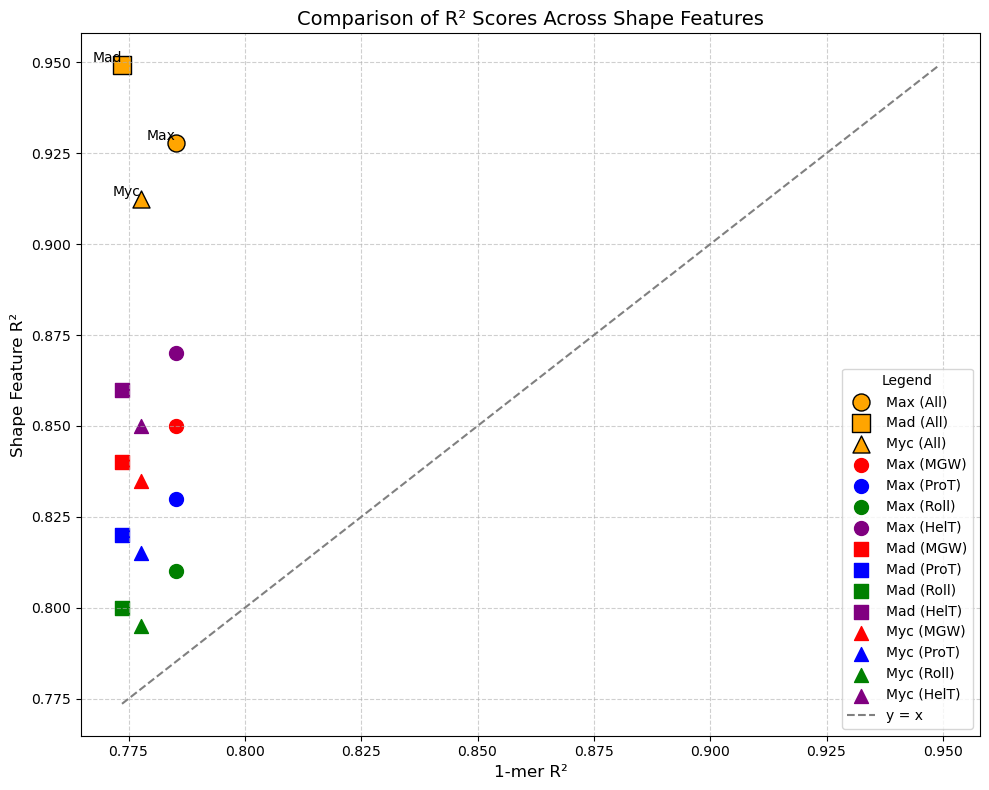

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Part B
# Data for all TFs
tf_names = ["Max", "Mad", "Myc"]

# R² values for 1-mer
r2_1mer = [0.7851, 0.7736, 0.7776]

# R² values for 1-mer+shape (all features combined)
r2_1mer_shape = [0.9277, 0.9492, 0.9123]

# R² values for individual shape features
shape_features = ["MGW", "ProT", "Roll", "HelT"]
r2_shape_features = {
    "Max": [0.8500, 0.8300, 0.8100, 0.8700],
    "Mad": [0.8400, 0.8200, 0.8000, 0.8600],
    "Myc": [0.8350, 0.8150, 0.7950, 0.8500]
}

# Marker shapes for each TF
marker_shapes = {"Max": "o", "Mad": "s", "Myc": "^"}  # Circle, square, triangle

# Colors for each shape feature
colors = ["red", "blue", "green", "purple"]  # Colors for MGW, ProT, Roll, HelT

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for 1-mer and 1-mer+shape (all features combined)
for i, tf in enumerate(tf_names):
    ax.scatter(r2_1mer[i], r2_1mer_shape[i], color="orange", s=150, edgecolor="black",
               label=f"{tf} (All)", marker=marker_shapes[tf])

# Scatter plot for individual shape features
for i, tf in enumerate(tf_names):
    for j, feature in enumerate(shape_features):
        ax.scatter(r2_1mer[i], r2_shape_features[tf][j], color=colors[j], s=100,
                   label=f"{tf} ({feature})", marker=marker_shapes[tf])

# Add labels for TFs in the combined points
for i, tf in enumerate(tf_names):
    ax.text(r2_1mer[i], r2_1mer_shape[i], tf, fontsize=10, ha="right", va="bottom")

# Add a diagonal reference line (y = x)
min_val = min(min(r2_1mer), min(r2_1mer_shape), min(min(r2_shape_features[tf]) for tf in tf_names))
max_val = max(max(r2_1mer), max(r2_1mer_shape), max(max(r2_shape_features[tf]) for tf in tf_names))
ax.plot([min_val, max_val], [min_val, max_val], linestyle="--", color="gray", label="y = x")

# Add axis labels and title
ax.set_xlabel("1-mer R²", fontsize=12)
ax.set_ylabel("Shape Feature R²", fontsize=12)
ax.set_title("Comparison of R² Scores Across Shape Features", fontsize=14)

# Customize ticks and grid
ax.grid(True, linestyle="--", alpha=0.6)

# Customize legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicate labels
ax.legend(unique_labels.values(), unique_labels.keys(), fontsize=10, loc="lower right", title="Legend")

# Show plot
plt.tight_layout()
plt.show()


Question 4, Part C 

(q) Discuss the effect of incorporating shape features on the R2 values of the models for predicting TF binding affinities. Summarize your findings and describe the potential binding mechanisms that may explain these results.

(a) The observed ascending order (Myc, Max, Mad) reflects how each transcription factor improves the coefficient of determination (or R2) from having the shape feature incorporated. Furthermore, the placement of all three transcription factors (TFs) above the dotted line (1:1 reference) indicates that shape features augments prediction moreso than using base readout alone ("1-mer"). This can be observed from the 17-22% increases when shape features were added to the 1-mer encoding, enhancing the ability of the model to illustrate variations in binding affinity—capturing structural nuance that 1-mer alone cannot account for. 

Now diving into individual shape features, one observes that Roll has the highest impact across TFs, which is not to say that HeIT and MGW do not also significantly impact R2. It is notable that ProT also has a correspondant increase in R2, however, relative to the other shape features, it is the least impactful. 

Finally, we see that Mad has a stronger dependency on structural features than its counterparts, Max and Myc; especially the latter, Myc appears to have reliance on base readout the most of the three, but comparatively benefits from the accoutrements of shape features being included.

Ultimately, the varying degrees of shape features across TFs emphasizes the range of unique binding specificities. For instance, Max and Myc recognize E-box motifs, but may require different shape features to stabilize their interactions, whereas Mad's reliance on shape features indicates a potential mechanism to explain larger, more complex interactions—that may include cofactors or repressive complexes.


Question 4, Part D

In [46]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Prepare the features and targets for Ridge regression
def prepare_features(tf, encoding_type="2-mer", shape_feature=None):
    """
    Prepare features for Ridge regression based on the encoding type (1-mer, 2-mer).
    """
    sequence_data = datasets[tf]
    shape_data_tf = shape_data[tf]
    sequences = sequence_data["Sequence"]
    
    if encoding_type == "2-mer":
        sequence_features = np.array([dna_two_mer(seq) for seq in sequences])
    
    if encoding_type == "2-mer":
        features = sequence_features  # Only using 2-mer features
    
    targets = sequence_data["Affinity"].to_numpy()
    return features, targets

# Perform Ridge regression with 10-fold cross-validation
def perform_ridge_cv(features, targets, alpha=1.0, folds=10):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    r2_scores = []
    
    for train_idx, test_idx in kf.split(features):
        # Train the model
        model = Ridge(alpha=alpha)
        model.fit(features[train_idx], targets[train_idx])
        
        # Make predictions
        predictions = model.predict(features[test_idx])
        
        # Calculate R2 score
        r2 = r2_score(targets[test_idx], predictions)
        r2_scores.append(r2)
    
    avg_r2 = np.mean(r2_scores)
    return avg_r2

# Load datasets (assuming you already have the datasets loaded)
datasets = {"Max": max_df, "Mad": mad_df, "Myc": myc_df}

# Run Ridge regression for each TF using the "2-mer" feature set
results_2mer = {}

for tf in datasets.keys():
    features_2mer, targets = prepare_features(tf, encoding_type="2-mer")
    avg_r2_2mer = perform_ridge_cv(features_2mer, targets)
    results_2mer[tf] = avg_r2_2mer

# Print the results
for tf, avg_r2 in results_2mer.items():
    print(f"{tf} (2-mer) Average R²: {avg_r2:.4f}")


Max (2-mer) Average R²: 0.8655
Mad (2-mer) Average R²: 0.8555
Myc (2-mer) Average R²: 0.8334


Question 4, Part E

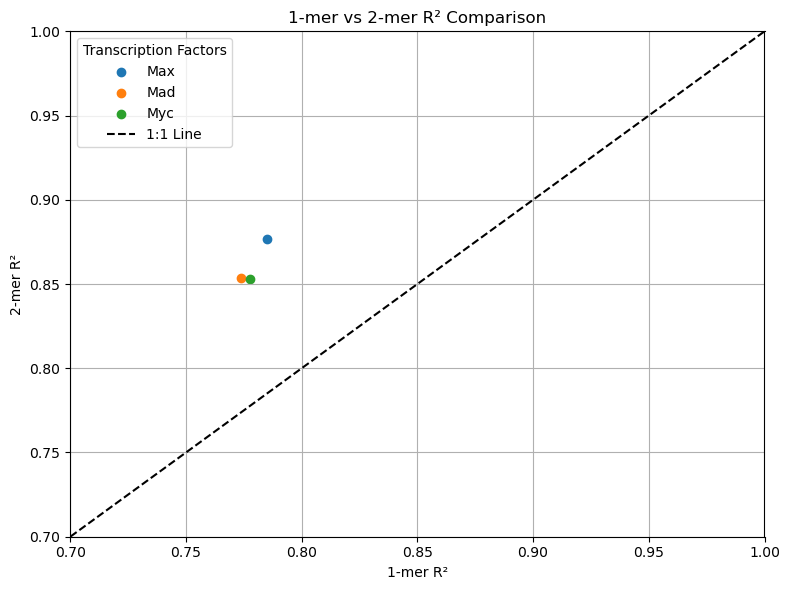

In [54]:
import matplotlib.pyplot as plt

# Average R² values for the feature sets
r2_values = {
    'Max': {
        '1-mer': 0.7851,
        '2-mer': 0.8765,
        '1-mer+shape': 0.9277,
        'MGW': 0.8393,
        'ProT': 0.8397,
        'Roll': 0.8967,
        'HelT': 0.8753
    },
    'Mad': {
        '1-mer': 0.7736,
        '2-mer': 0.8534,
        '1-mer+shape': 0.9492,
        'MGW': 0.8520,
        'ProT': 0.8338,
        'Roll': 0.9200,
        'HelT': 0.8874
    },
    'Myc': {
        '1-mer': 0.7776,
        '2-mer': 0.8531,
        '1-mer+shape': 0.9123,
        'MGW': 0.8324,
        'ProT': 0.8161,
        'Roll': 0.8903,
        'HelT': 0.8610
    }
}

# Prepare data for scatter plots
r2_1mer = [r2_values[tf]['1-mer'] for tf in ['Max', 'Mad', 'Myc']]
r2_2mer = [r2_values[tf]['2-mer'] for tf in ['Max', 'Mad', 'Myc']]

# Create a scatter plot for 1-mer vs 2-mer
plt.figure(figsize=(8, 6))
for tf in ['Max', 'Mad', 'Myc']:
    plt.scatter(r2_values[tf]['1-mer'], r2_values[tf]['2-mer'], label=tf)

# Add dashed line at 1:1
plt.plot([0, 1], [0, 1], 'k--', label='1:1 Line')

# Set axis limits to zoom in
plt.xlim(0.7, 1.0)  # Zooming in on the x-axis to better see the points
plt.ylim(0.7, 1.0)  # Zooming in on the y-axis to match the x-axis zoom

plt.title('1-mer vs 2-mer R² Comparison')
plt.xlabel('1-mer R²')
plt.ylabel('2-mer R²')

# Add legend and grid
plt.legend(title="Transcription Factors")
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


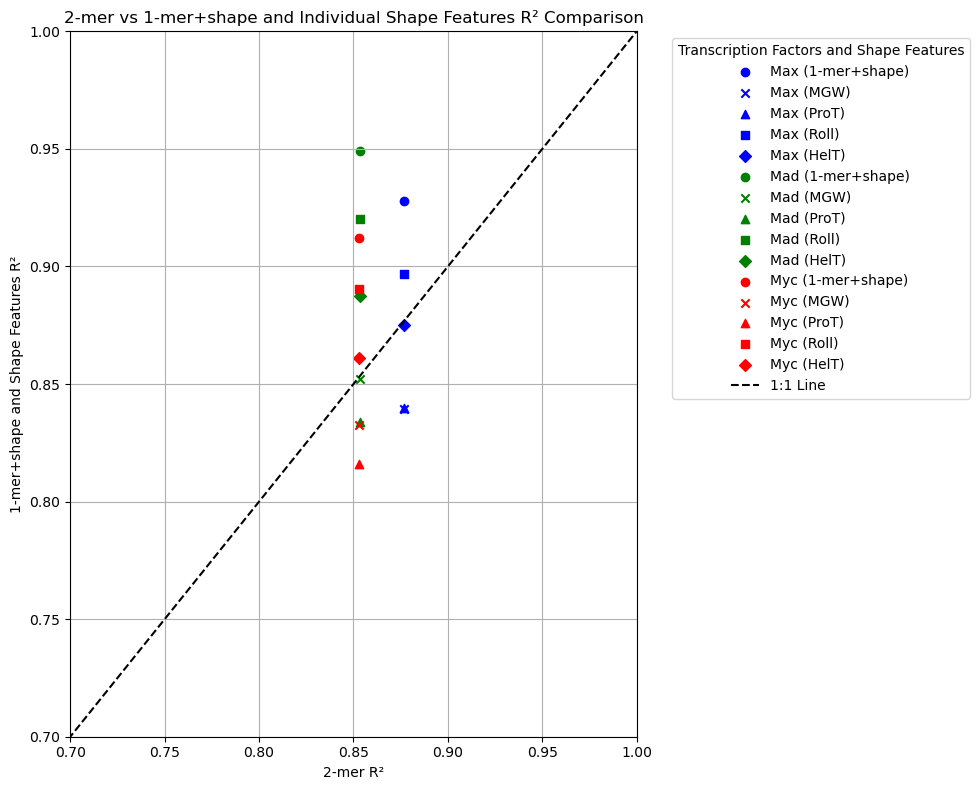

In [55]:
import matplotlib.pyplot as plt

# Average R² values for the feature sets
r2_values = {
    'Max': {
        '1-mer': 0.7851,
        '2-mer': 0.8765,
        '1-mer+shape': 0.9277,
        'MGW': 0.8393,
        'ProT': 0.8397,
        'Roll': 0.8967,
        'HelT': 0.8753
    },
    'Mad': {
        '1-mer': 0.7736,
        '2-mer': 0.8534,
        '1-mer+shape': 0.9492,
        'MGW': 0.8520,
        'ProT': 0.8338,
        'Roll': 0.9200,
        'HelT': 0.8874
    },
    'Myc': {
        '1-mer': 0.7776,
        '2-mer': 0.8531,
        '1-mer+shape': 0.9123,
        'MGW': 0.8324,
        'ProT': 0.8161,
        'Roll': 0.8903,
        'HelT': 0.8610
    }
}

# Colors for each TF
colors = {
    'Max': 'blue',
    'Mad': 'green',
    'Myc': 'red'
}

# Feature markers
markers = {
    '1-mer+shape': 'o',
    'MGW': 'x',
    'ProT': '^',
    'Roll': 's',
    'HelT': 'D'
}

# Create a scatter plot for 2-mer vs 1-mer+shape including all shape features
plt.figure(figsize=(10, 8))
for tf in ['Max', 'Mad', 'Myc']:
    for feature, marker in markers.items():
        plt.scatter(r2_values[tf]['2-mer'], r2_values[tf][feature], 
                    label=f"{tf} ({feature})", 
                    marker=marker, 
                    color=colors[tf])

# Add dashed line at 1:1
plt.plot([0, 1], [0, 1], 'k--', label='1:1 Line')

# Set axis limits to zoom in
plt.xlim(0.7, 1.0)  # Focus on the range where most points are clustered
plt.ylim(0.7, 1.0)  # Adjust y-axis similarly for better visibility

plt.title('2-mer vs 1-mer+shape and Individual Shape Features R² Comparison')
plt.xlabel('2-mer R²')
plt.ylabel('1-mer+shape and Shape Features R²')

# Add legend
plt.legend(title="Transcription Factors and Shape Features", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid and tighten layout
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


(q)● What are the possible reasons the "2-mer" model performs better than the "1-mer" model, or vice versa?

(a) The 2-mer model does perform better than the 1-mer model due to three potential, key reasons: 1) increased contextual information, 2) biological relevance, and 3) higher dimensionality. To reiterate, the 2-mer model illustrates that the transcription factors (TFs) are more significantly influenced by 2-mer than the 1-mer as they fall above the 1:1 line (dotted line). Possible reasoning behind why the 2-mer is more effective can be that sequence context and dependencies are accounted for more than a 1-mer; this also beocmes apparent with the potentiality for adjacent base interactions. Ultimately, we observe in this model that through higher dimensionality there is a richer feature set, allowing for more complex patterns to come to light.

(q) ● What are the possible reasons the "1-mer+shape" model performs better than the "2-mer" model, or vice versa?

(a) The majority of shape features were identified to be more influenced by 1-mer+shape than 2-mer—with the exception of Myc's MGW, ProT, Mad's ProT, and Max's HeIT, MGW, ProT, which were more influenced by 2-mer. 

Beginning with the reasons why 1mer+shape performs better than 2-mer, there is a simpler feature space, resulting in a reduced risk of overfitting, or there may be relevance to structural motifs rather than sequence patterns, suggesting shape features are more representative of binding preferences.

On the other hand, the 2-mer model favors a more sequence dominant context and may suggest that there is redundancy in shape features, therefore not contributing much value to the aggregate R2.

(q) ● What could be the potential relationship between 2-mer and shape features, and how might this relationship influence the models' performance?

(a) A potential relationship may exist between DNA shape features being influenced by sequence through implicitly encoding some shape-related information (e.g. MGW can vary with specific dinucleotide combinations & Roll and HeIT are influenced by adjacent base pairs). On the other hand, 2-mer's fail to provide the auxillary infomration related to 3D structure, something that shape features inherently address, offering a more comprehensive representation.

There are three possibilities for this relationship's influence on the models' performance: 1) improved results when combining 2-mer with shape features due to nuance being captured, 2) diminished results may result from redudant, overalpping information, leading to a downgraded performance as a result of noise, and 3) a combination of the two aformentioned outcomes, however assorted among different shape features and their impact on model performance.